# Installs

In [93]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

# Imports

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the raw data

In [3]:
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Data Cleaning, Null Values, Duplicates

In [4]:
print(df.isnull().sum())
print(df.duplicated().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64
0


# Functions to plot data

In [6]:
def plot_all_in_one(data_frame):
    for col in data_frame.columns:
        sns.lineplot(data=data_frame, x=data_frame.index, y=col, label=col)
    plt.title("All Data In One Plot")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.show()
    
def plot_separate(data_frame):
    for col in data_frame.columns:
        plt.figure(figsize=(10,6))
        sns.lineplot(data=data_frame, x=data_frame.index, y=col)
        plt.title(f"{col}")
        plt.xlabel("Index")
        plt.ylabel("Value")
        plt.show()
    

# Removing Outliers

In [7]:
print(df.shape)

df_clean = df.copy()
#for column in df_clean.columns:
#    if df_clean[column].dtype in [float, int]:  # Columns with numerical values
#        Q1 = df_clean[column].quantile(0.25)
#        Q3 = df_clean[column].quantile(0.75)
#        IQR = Q3 - Q1
#        
#        lower_bound = Q1 - 1.5 * IQR
#        upper_bound = Q3 + 1.5 * IQR
#        
#        # Remove outliers
#        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

# Look at the shape of the new dataframe
print(df_clean.shape)  # New shape


(178, 14)
(178, 14)


# Plotting the data

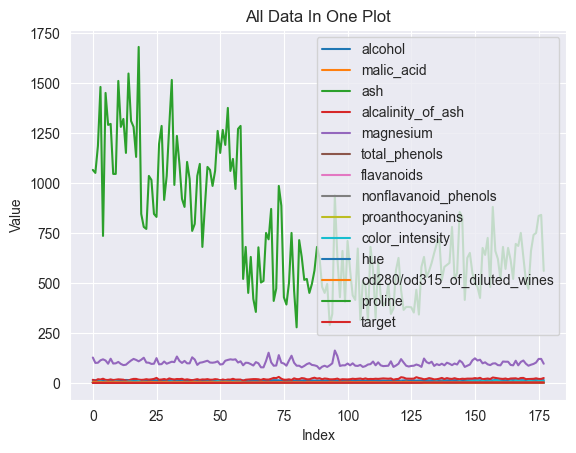

In [98]:
plot_all_in_one(df_clean)

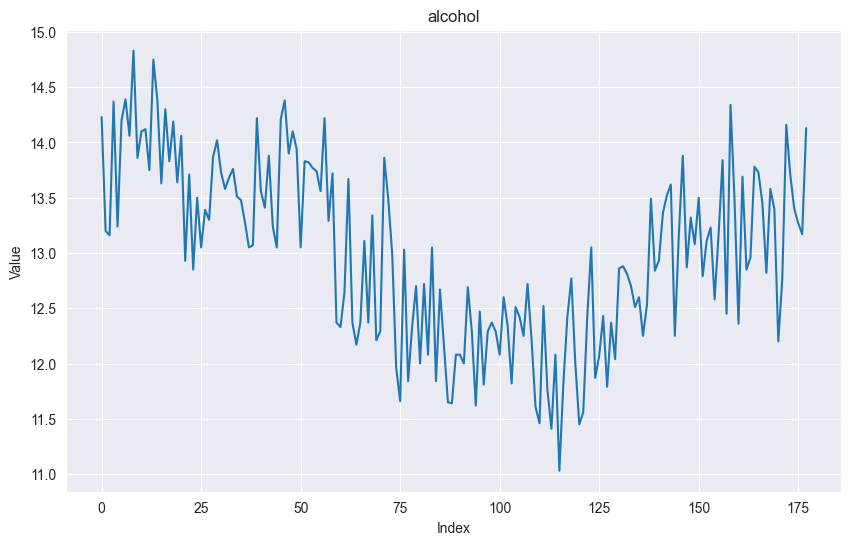

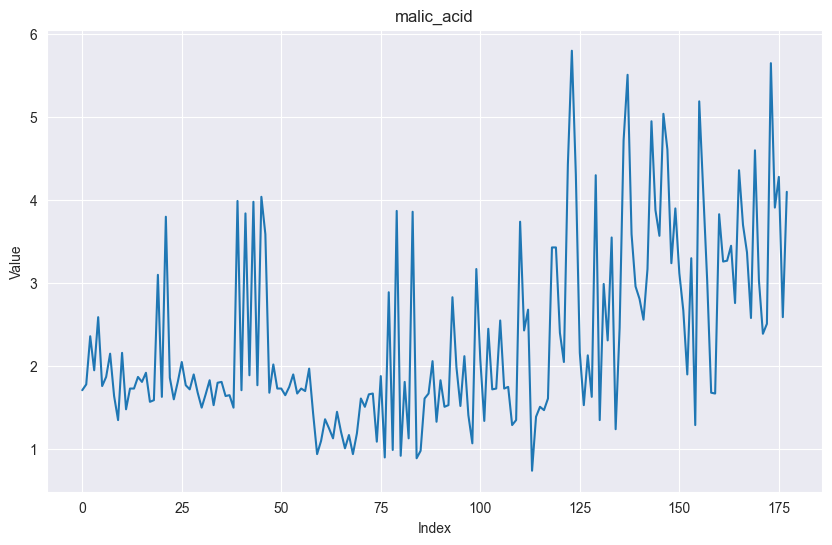

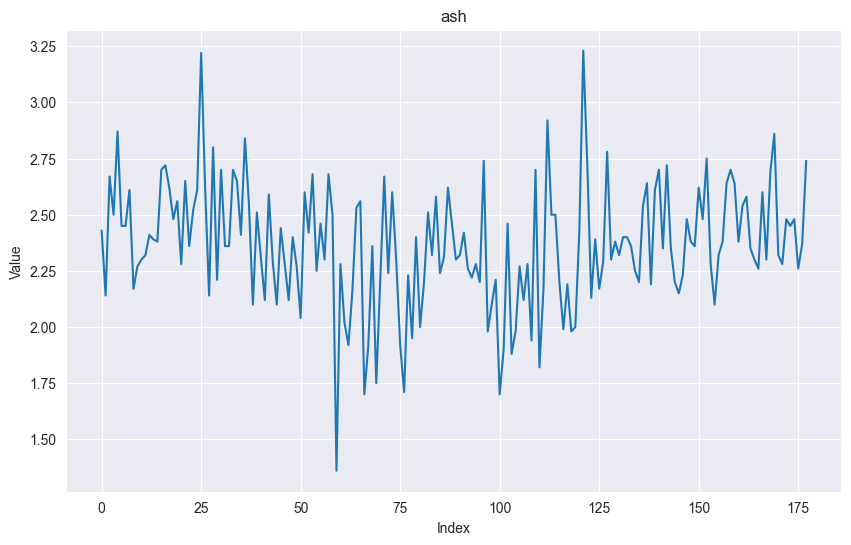

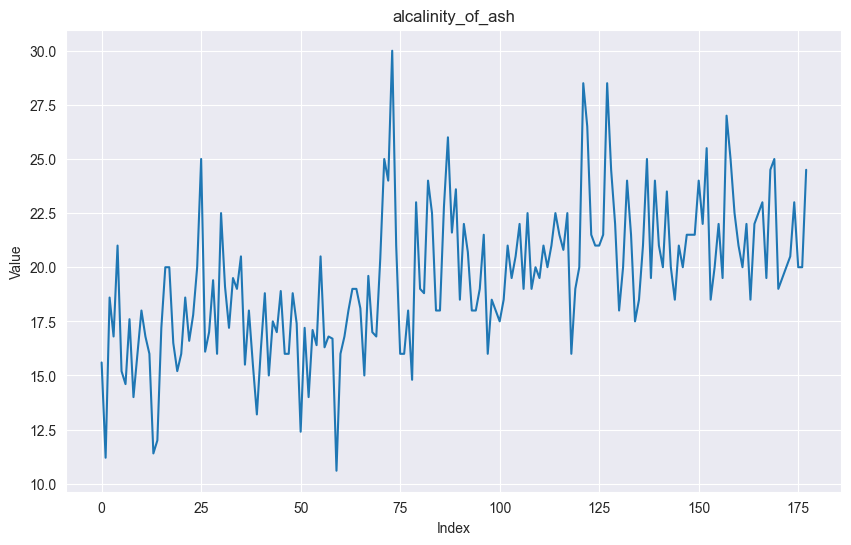

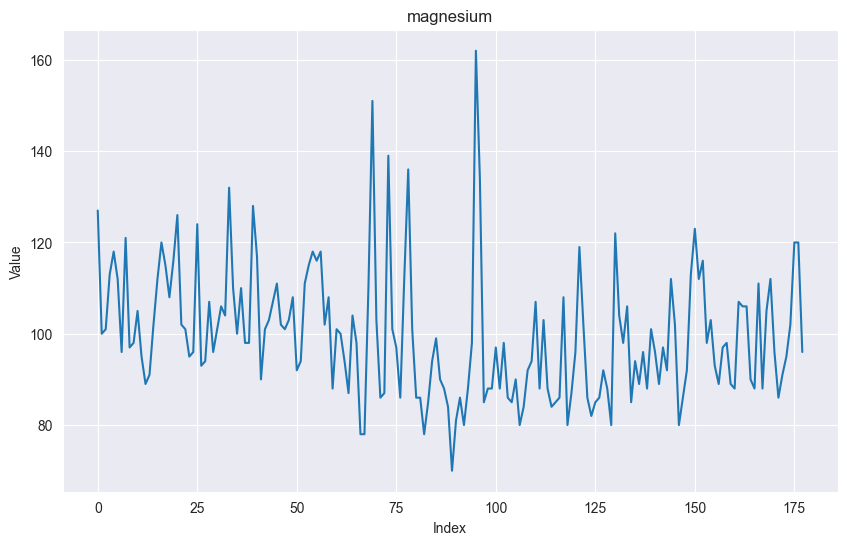

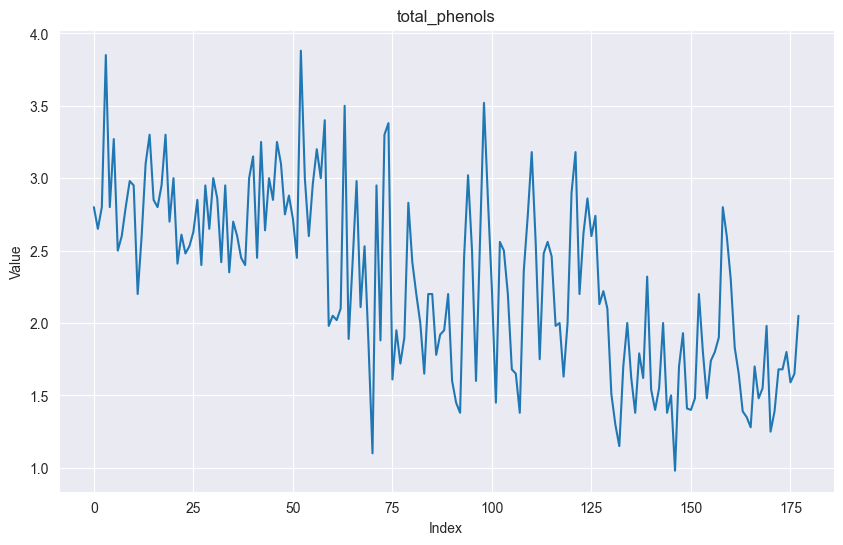

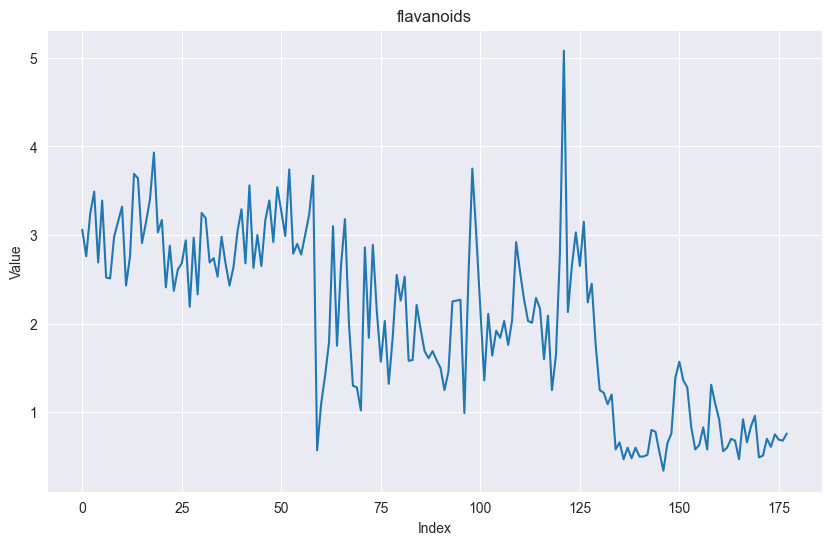

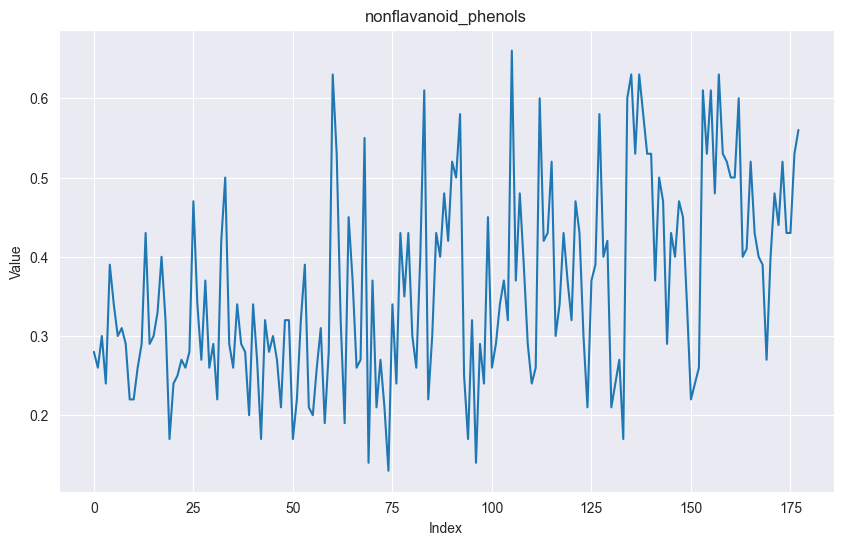

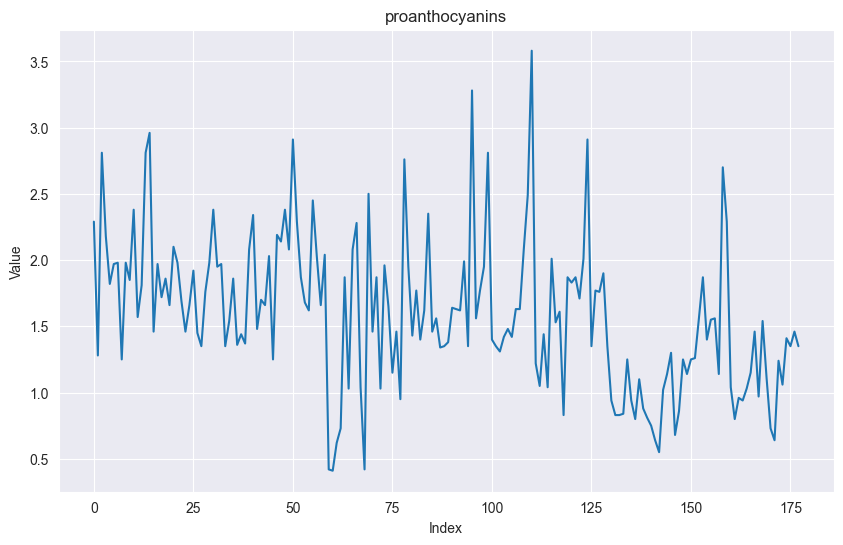

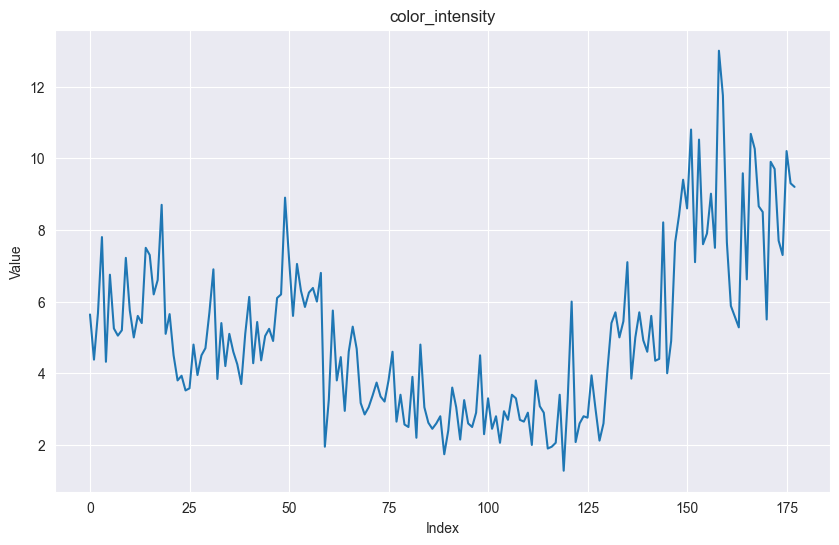

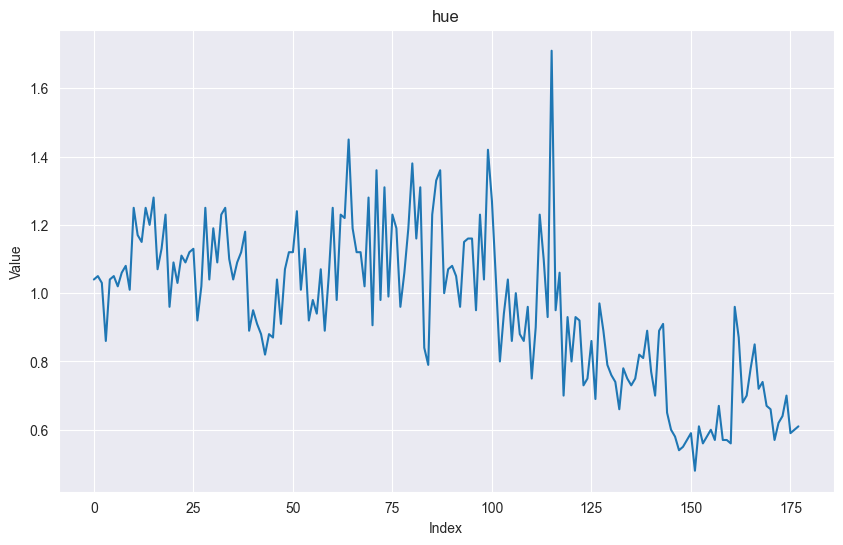

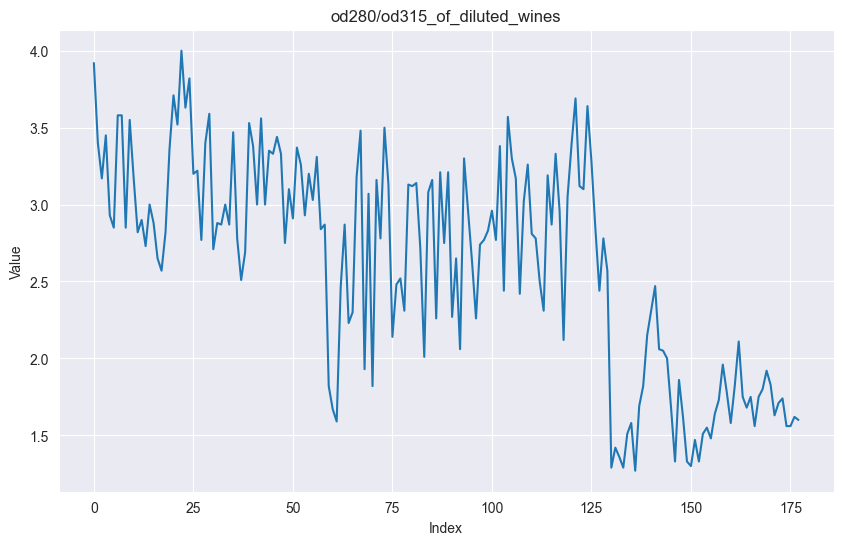

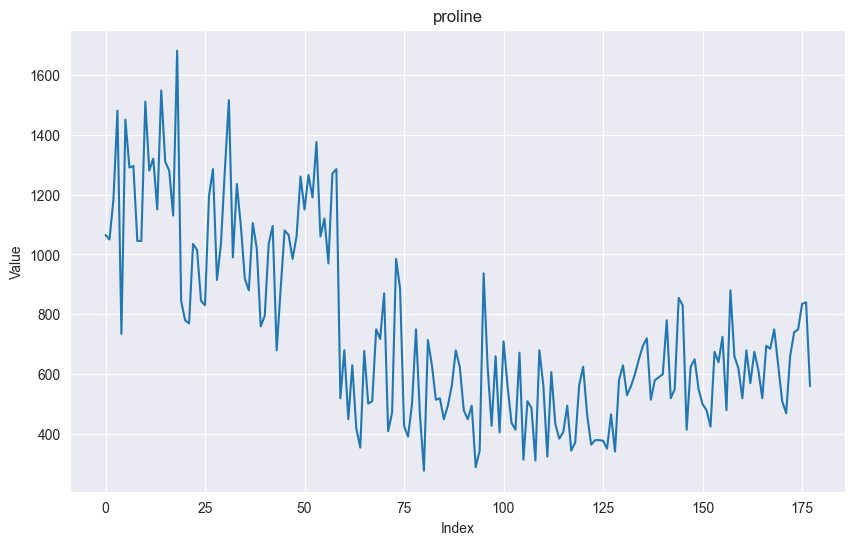

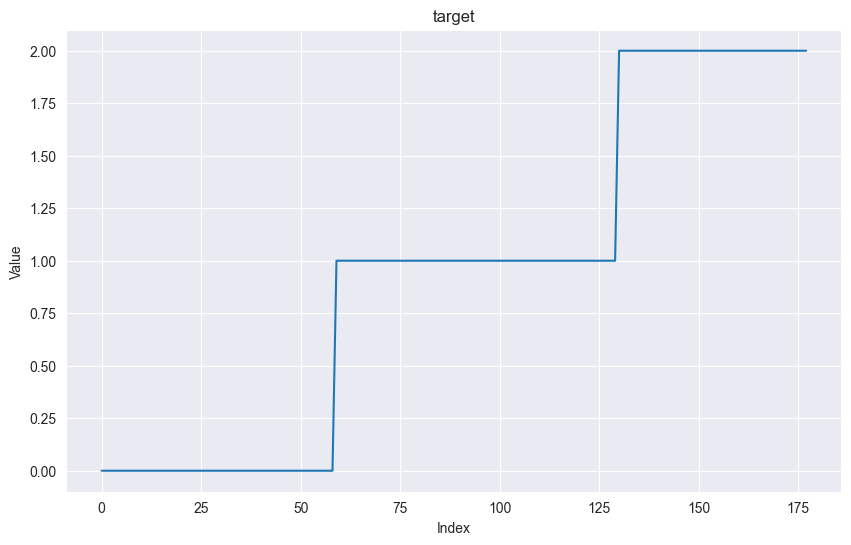

In [99]:
plot_separate(df_clean)

# Validating the alcohol values

- 0 - 100% valid alcohol values -> negative values are invalid
- after the description, we can see that the minimum value is 11.03 and the maximum value is 14.83, so the values are valid

In [8]:
# 0 - 100% valid alcohol values -> negative values are invalid

alcohol_column = df_clean['alcohol']

min_value = 0
max_value = 100

df_valid = df_clean[(alcohol_column >= min_value) & (alcohol_column <= max_value)]

df_valid.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# Wine preferences distribution across wine classes

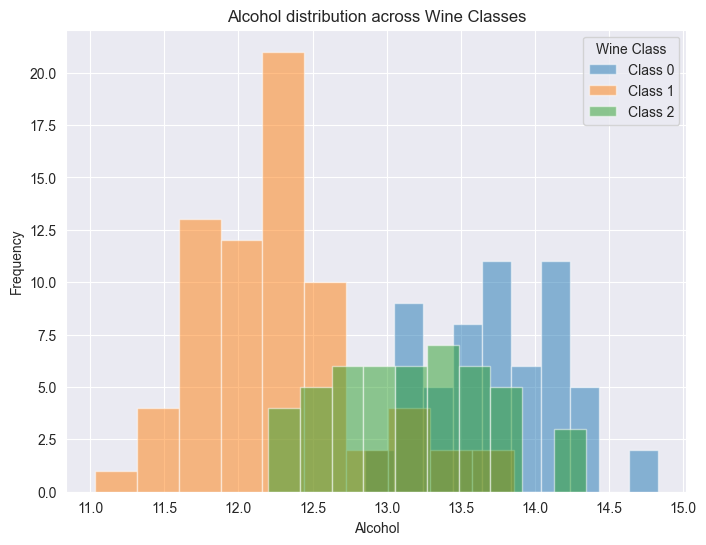

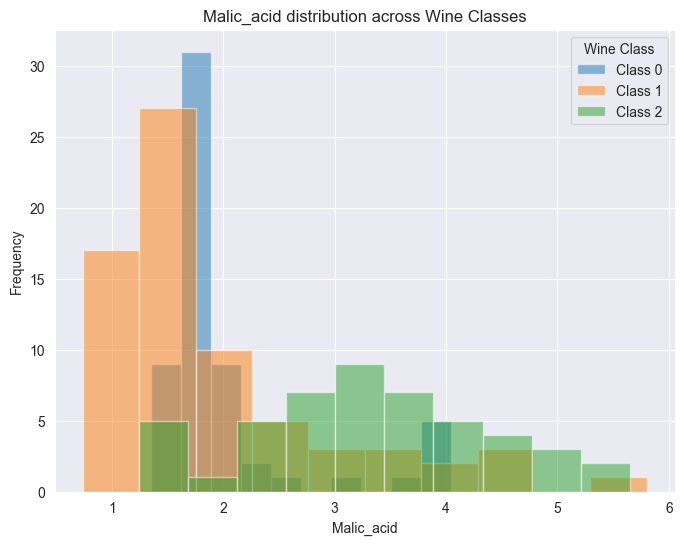

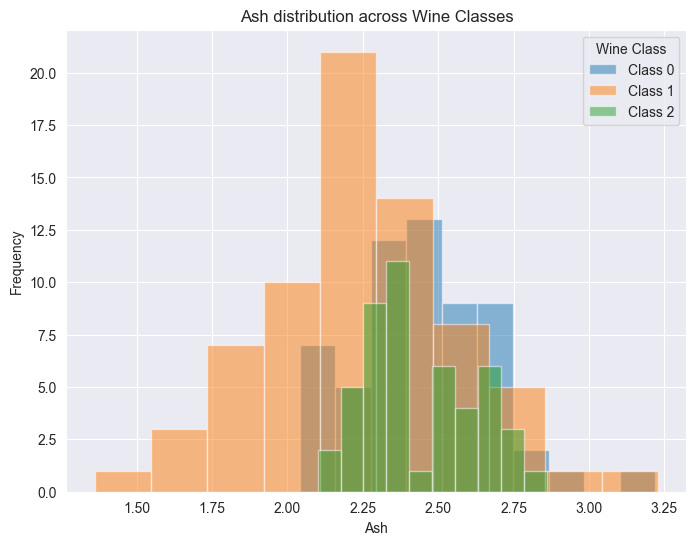

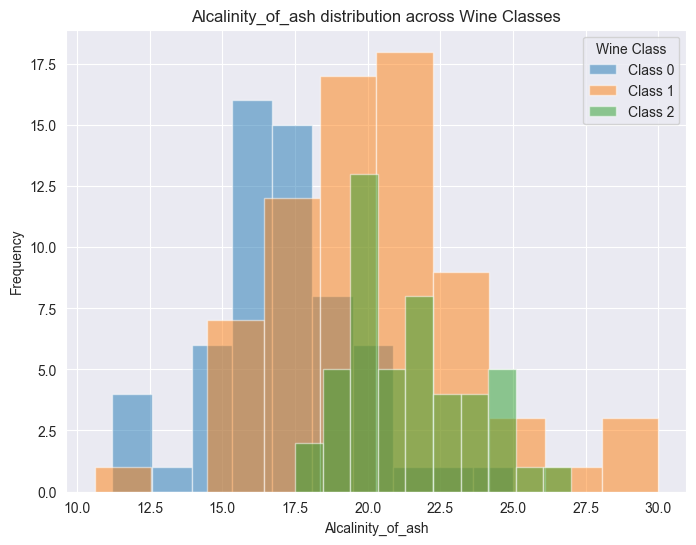

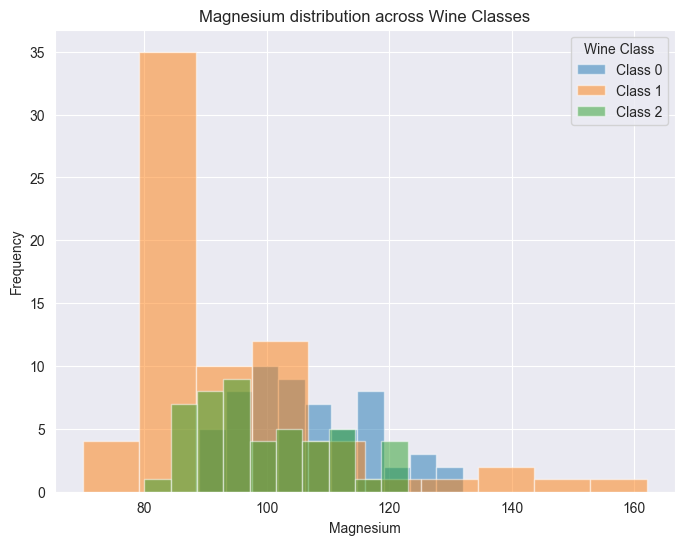

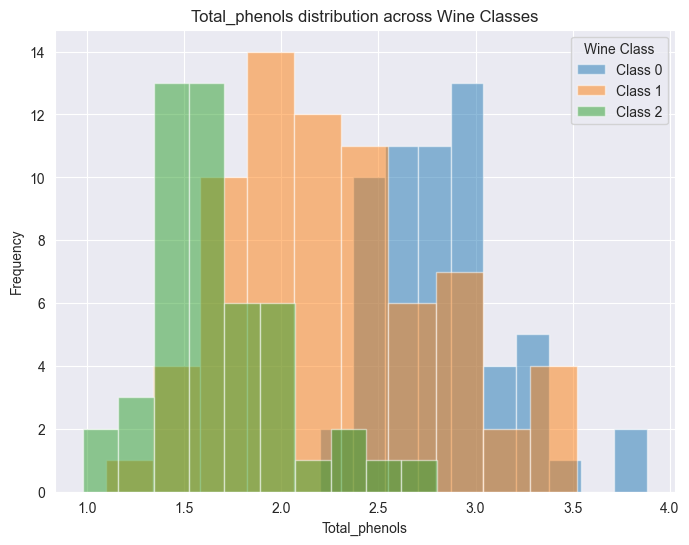

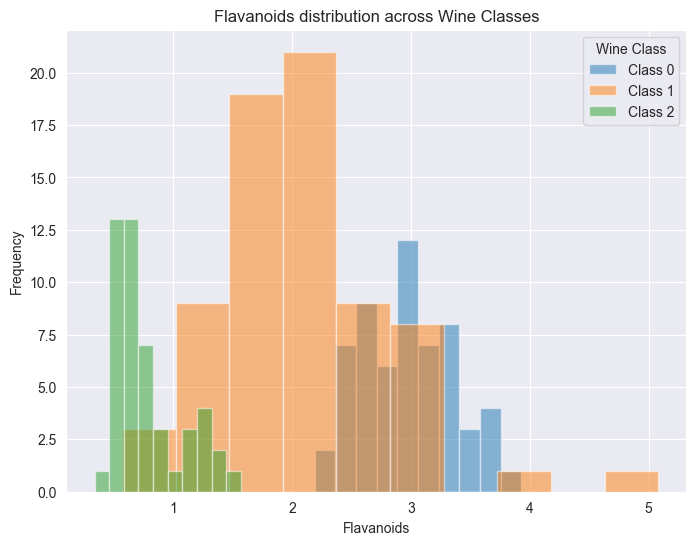

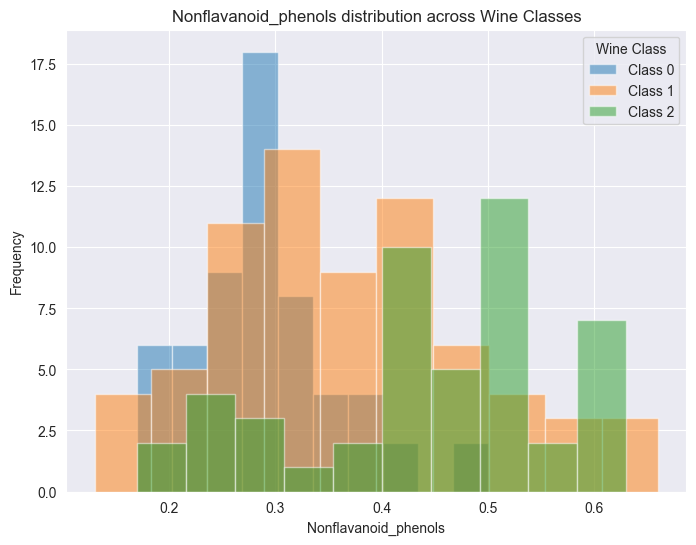

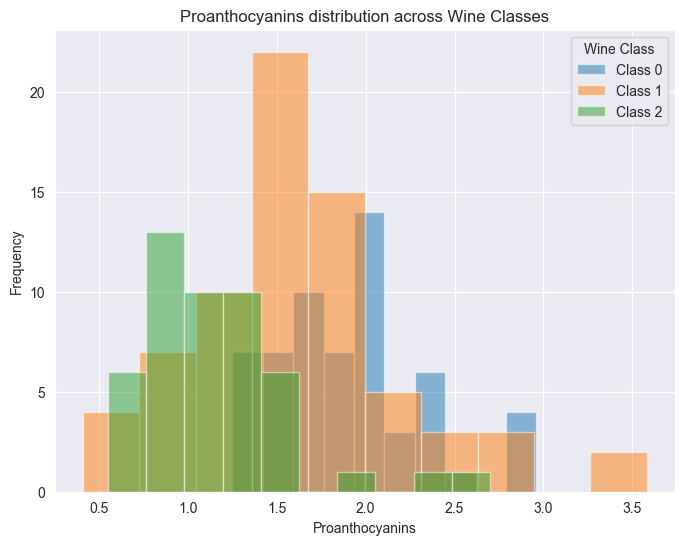

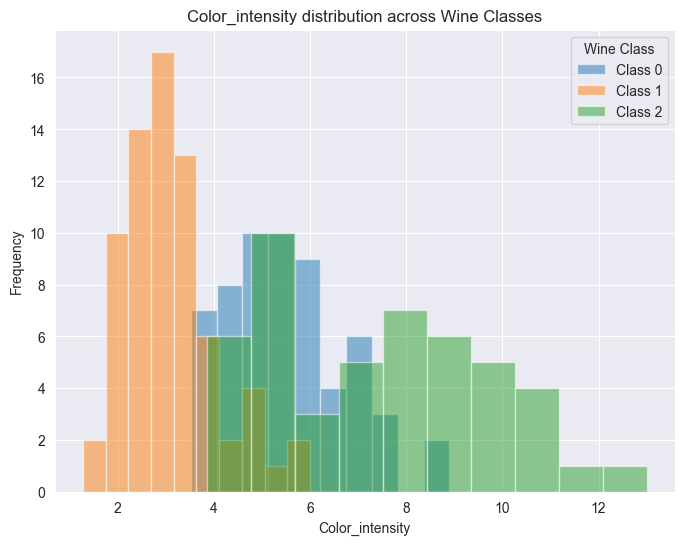

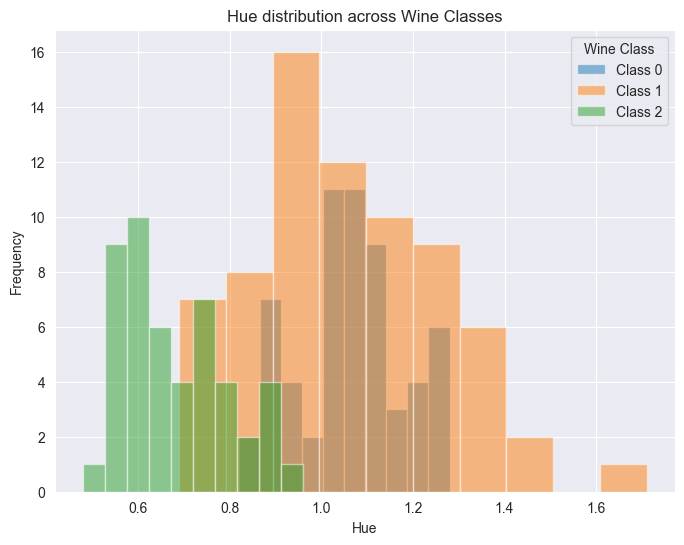

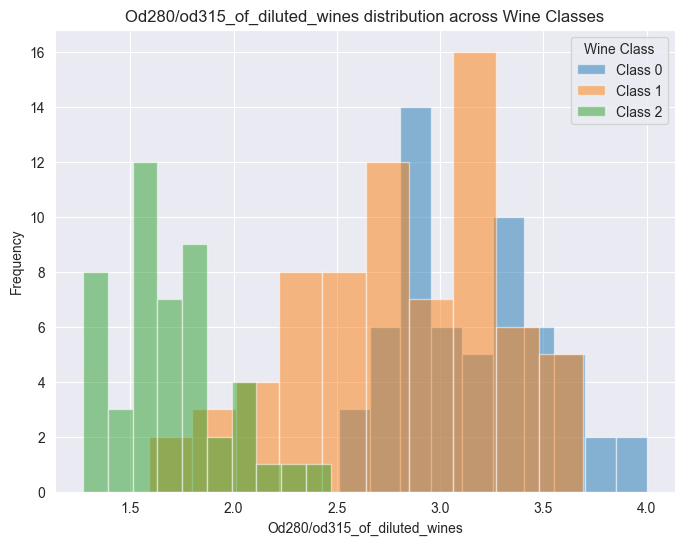

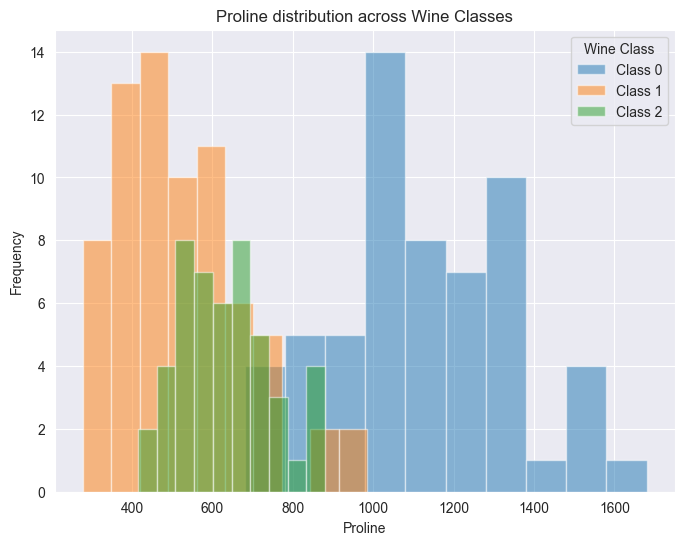

In [9]:
grouped_df = df.groupby('target').mean()
#print(grouped_df)

for column in df.columns:
    if column != 'target':
        plt.figure(figsize=(8, 6))
        
        for wine_class in df['target'].unique():
            subset = df[df['target'] == wine_class]
            plt.hist(subset[column], alpha=0.5, label=f'Class {wine_class}')
        
        plt.xlabel(column.capitalize())
        plt.ylabel('Frequency')
        plt.legend(title='Wine Class')
        plt.title(f'{column.capitalize()} distribution across Wine Classes')
        plt.show()

# Standardizing the data

In [10]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

df_standardized.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944


In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_standardized)

C:\Users\solym\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
